# 4.9 Intro to Data Visualization with Python - Practice

## 01. Importing Libraries

In [3]:
# Import Libraries
import pandas as pd
import numpy as np
import os
import matplotlib.pyplot as plt
import seaborn as sns
import scipy

## 02. Importing Data & Create Path

In [5]:
path = r'/Users/natalieaguilar/Documents/Instacart Basket Analysis'

In [6]:
ords_prods_merge = pd.read_pickle(os.path.join(path, '02 Data', 'Prepared Data', 'ords_prods_merge_updated.pkl'))

<Axes: xlabel='orders_day_of_week'>

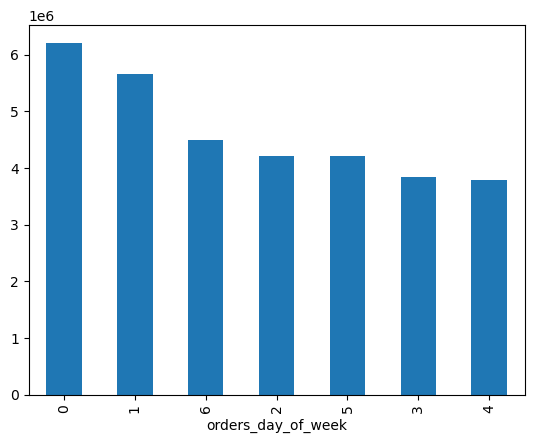

In [7]:
# Create a bar chart

ords_prods_merge['orders_day_of_week'].value_counts().plot.bar()

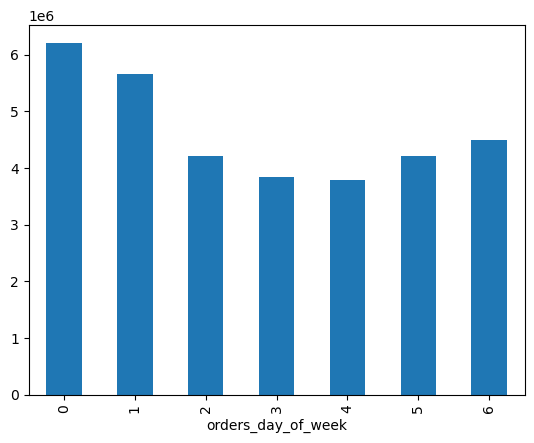

In [8]:
# Organising your data in a specific order based on the index

bar = ords_prods_merge['orders_day_of_week'].value_counts().sort_index().plot.bar()

In [9]:
# sort_index() used for organising your data in a specific order based on the index 
# this can also be used when printing frequencies

ords_prods_merge['orders_day_of_week'].value_counts()

orders_day_of_week
0    6209632
1    5665830
6    4500246
2    4217766
5    4209449
3    3844096
4    3787193
Name: count, dtype: int64

In [12]:
ords_prods_merge['orders_day_of_week'].value_counts().sort_index()

orders_day_of_week
0    6209632
1    5665830
2    4217766
3    3844096
4    3787193
5    4209449
6    4500246
Name: count, dtype: int64

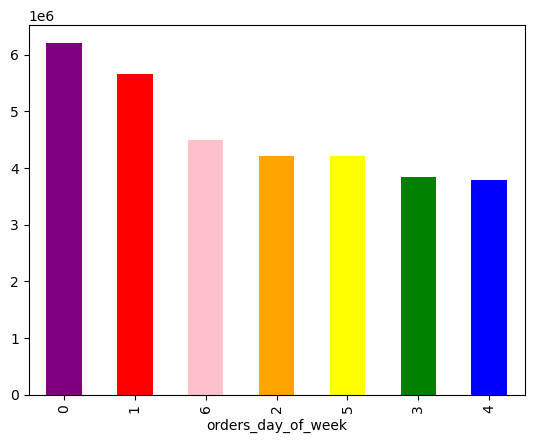

In [14]:
# Changing the colors of the bar chart

bar = ords_prods_merge['orders_day_of_week'].value_counts().plot.bar(color =['purple', 'red', 'pink', 'orange', 'yellow', 'green', 'blue'])

In [15]:
# Saving the visualization in a folder

bar.figure.savefig(os.path.join(path, '04 Analysis','Visualizations', 'bar_orders_dow.png'))

## 4. Histograms

<Axes: ylabel='Frequency'>

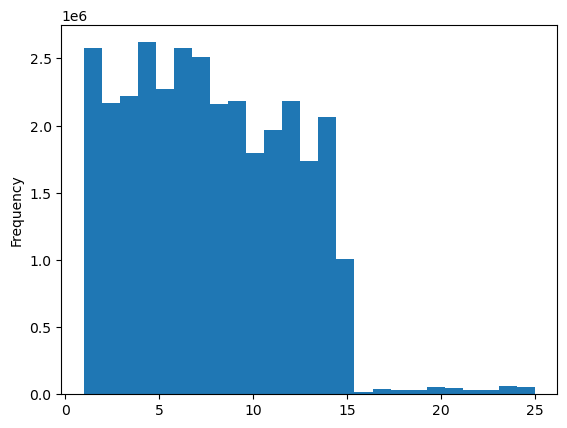

In [18]:
# Creating a histogram

ords_prods_merge['prices'].plot.hist(bins = 25)

In [19]:
# Running Data Consistency Check

ords_prods_merge['prices'].describe()

count    3.243421e+07
mean     7.795594e+00
std      4.242823e+00
min      1.000000e+00
25%      4.200000e+00
50%      7.400000e+00
75%      1.130000e+01
max      2.500000e+01
Name: prices, dtype: float64

In [21]:
ords_prods_merge['prices'].mean()

7.795594408151491

In [23]:
ords_prods_merge['prices'].median()

7.4

In [24]:
ords_prods_merge['prices'].max()

25.0

<Axes: xlabel='prices', ylabel='prices'>

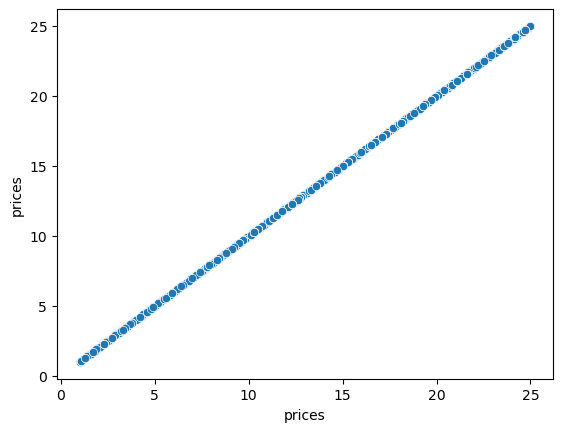

In [26]:
# Creating a scatterplot

sns.scatterplot(x = 'prices', y = 'prices',data = ords_prods_merge)

In [27]:
# Checking outliers, data above a certain threshold, anything above the the "normal" price of a supermarket item.

ords_prods_merge.loc[ords_prods_merge['prices'] > 100]

,order_id,user_id,order_number,orders_day_of_week,order_hour_of_day,days_since_prior_order,product_id,add_to_cart_order,reordered,_merge,product_name,aisle_id,department_id,prices,match,price_range_loc,busiest_day,busiest_days,busiest_period_of_day


We can see that there are no outliers here

In [31]:
# Marking outliers as missing ~ as NaN

ords_prods_merge.loc[ords_prods_merge['prices'] >100, 'prices'] = np.nan

In [32]:
# Checking the max in prices 

ords_prods_merge['prices'].max()

25.0

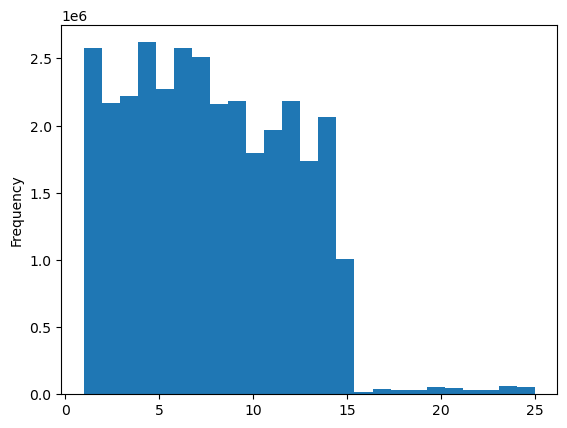

In [33]:
# Retrying to plot the Histogram 

hist = ords_prods_merge['prices'].plot.hist(bins = 25)

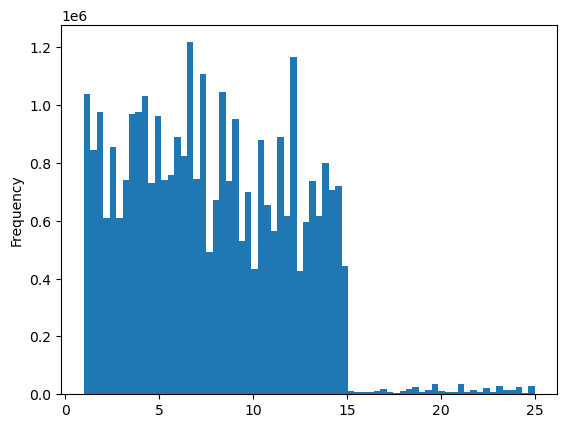

In [34]:
hist_2 = ords_prods_merge['prices'].plot.hist(bins = 70)

In [35]:
# Exporting the histogram

hist_2.figure.savefig(os.path.join(path, '04 Analysis','Visualizations', 'hist_prices.png'))

## 5. Creating Line Chart

In [37]:
# Subsetting method

df = ords_prods_merge[:2000000]

In [38]:
# Ensuring that the random distribution you’re creating is reproducible

np.random.seed(4)
dev = np.random.rand(len(ords_prods_merge)) <= 0.7

In [65]:
dev

array([False,  True, False, ..., False,  True,  True])

In [67]:
# the function produces a list of random numbers between 0 and 1. 

np.random.rand(10)

array([0.40628592, 0.90884833, 0.15028545, 0.74569012, 0.26147816,
       0.41379021, 0.58956874, 0.52835639, 0.41164235, 0.51852706])

In [79]:
# This function is what will actually create your list of random floating numbers between 1 to 0

np.random.seed(42)

In [81]:
# Produces a value that represents the length of whatever you put inside it.

len(ords_prods_merge)

32434212

In [75]:
# This will split your samples into big and small, 70% and 30% respectively

big = ords_prods_merge[dev]
small = ords_prods_merge[~dev]

In [83]:
len(ords_prods_merge)

32434212

In [85]:
# Should equal to the number above

len(big) + len(small)

32434212

In [87]:
#Reducing your samples only those columns necessary for the chart, namely "prices" and "orders_day_of_the_week"

df_2 = small[['orders_day_of_week','prices']]

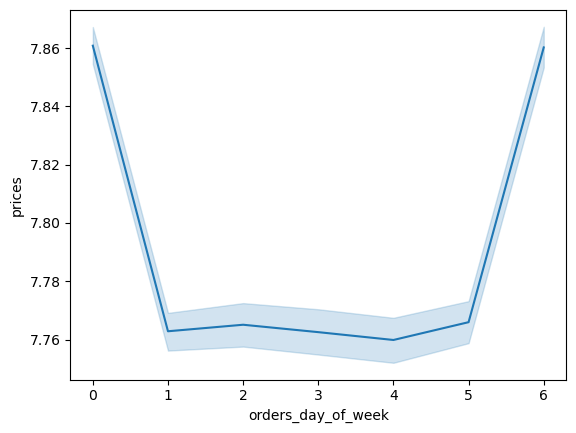

In [89]:
# Creating a line plot

line = sns.lineplot(data = df_2, x = 'orders_day_of_week',y = 'prices')

In [91]:
# Exporting the histogram

hist_2.figure.savefig(os.path.join(path, '04 Analysis','Visualizations', 'lineplot_prices_orders_day_of_week.png'))